## All the old data, everything we've done before copied :)

In [1]:
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [64]:
df=pd.read_csv('https://raw.githubusercontent.com/okravtsova123/ironhack_study/main/labs/python_lab_2901/marketing_customer_analysis_clean.csv')
#separating numericals from the original dataset
df_numerical=df.select_dtypes(include='number')
df_numerical=df_numerical.drop("unnamed:_0", axis=1)
df_numerical
X=df_numerical[["customer_lifetime_value","income","monthly_premium_auto","months_since_last_claim","months_since_policy_inception","number_of_open_complaints", "number_of_policies", "month"]]
y=df_numerical[["total_claim_amount"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer()
pt.fit(X_train)

X_train=pd.DataFrame(pt.transform(X_train))

df_numerical.columns

X_train=X_train.rename(columns={0:"customer_lifetime_value", 1:"income",2:"monthly_premium_auto", 3:"months_since_last_claim", 4:"months_since_policy_inception", 5:"number_of_open_complaints", 6:"number_of_policies", 7:"total_claim_amount", 8:"month"})

X_test=pd.DataFrame(pt.transform(X_test))

X_test=X_test.rename(columns={0:"customer_lifetime_value", 1:"income",2:"monthly_premium_auto", 3:"months_since_last_claim", 4:"months_since_policy_inception", 5:"number_of_open_complaints", 6:"number_of_policies", 7:"total_claim_amount", 8:"month"})

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train,y_train)

y_pred=pd.DataFrame(model.predict(X_test))
y_test=y_test.reset_index(drop=True)
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
MSE=mse(y_test, y_pred)
MAE=mae(y_test, y_pred)
RMSE=mse(y_test, y_pred, squared=False)

## Calculating R2_score for the model based only on numericals

In [7]:
from sklearn.metrics import r2_score

In [9]:
#calculating r2_score for test set
r2_score(y_test,y_pred)

0.4496112658742951

In [65]:
#calculating r2_score for train set
y_train_pred=pd.DataFrame(lr.predict(X_train))
r2_score(y_train,y_train_pred)

0.42061844452491715

## CREATING MODEL FOR ALL VARIABLES

## Combining numericals and categoricals

### old code from prev lab to get all encoded

In [29]:
#getting the object columns into categorical df to devide them into the nominals and ordinals
df_category=df.select_dtypes(include='object')

#deviding df_category; separating nominals
df_category_nominals=df_category[['state','response', 'employmentstatus','gender', 'location_code', 'marital_status', 'policy', 'renew_offer_type', 'sales_channel',"vehicle_class", "vehicle_type"]]

#transforming nominals for ML
df_category_nominals=pd.get_dummies(df_category_nominals, dtype=int)

#deviding df_category; separating ordinals
df_category_ordinals=df_category[['coverage', 'education',"vehicle_size"]]

#maping ordinals
df_category_ordinals['education'].unique()
df_category_ordinals['education']=df_category_ordinals['education'].map({"High School or Below": 1, "College": 2, "Bachelor": 3, "Master": 4, "Doctor": 5})

df_category_ordinals['vehicle_size'].unique()
df_category_ordinals['vehicle_size']=df_category_ordinals['vehicle_size'].map({'Small': 1, 'Medsize': 2, 'Large': 3})

df_category_ordinals['coverage'].unique()
df_category_ordinals['coverage']=df_category_ordinals['coverage'].map({'Basic': 1, 'Extended': 2, 'Premium': 3})

df_category=pd.concat([df_category_nominals, df_category_ordinals], axis=1)
df_category

df_numerical=df.select_dtypes(include='number')
df_numerical=df_numerical.drop("unnamed:_0", axis=1)


C:\Users\user\AppData\Local\Temp\ipykernel_20148\729644646.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_category_ordinals['education']=df_category_ordinals['education'].map({"High School or Below": 1, "College": 2, "Bachelor": 3, "Master": 4, "Doctor": 5})
C:\Users\user\AppData\Local\Temp\ipykernel_20148\729644646.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_category_ordinals['vehicle_size']=df_category_ordinals['vehicle_size'].map({'Small': 1, 'Medsize': 2, 'Large': 3})
C:\Users\user\

In [30]:
df_full=pd.concat([df_numerical, df_category], axis=1)
df_full

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,state_Arizona,...,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A,coverage,education,vehicle_size
0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2,1,...,1,0,0,0,0,0,1,1,2,2
1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1,0,...,1,0,0,0,0,0,1,1,2,2
2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2,0,...,0,0,0,1,0,0,1,1,3,2
3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1,0,...,1,0,0,0,0,0,1,2,2,2
4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1,0,...,1,0,0,0,0,0,1,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1,0,...,0,1,0,0,0,0,1,3,3,2
10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1,0,...,1,0,0,0,0,0,1,1,2,2
10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2,1,...,0,0,1,0,0,0,1,2,3,2
10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2,0,...,0,0,0,1,0,0,1,3,2,2


## X-Y split

In [31]:
#defining X and y

X=df_full.drop("total_claim_amount", axis=1)
y=df_full[["total_claim_amount"]]

In [32]:
#spliting X and y
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42)

## Scaling

In [35]:
#scaling everything with powertransformation for X_train
pt=PowerTransformer()
pt.fit(X_train)
X_train=pt.transform(X_train)

In [36]:
#scaling everything with powertransformation for X_test with fit from X_train
X_test=pt.transform(X_test)

array([[<Axes: title={'center': 'total_claim_amount'}>]], dtype=object)

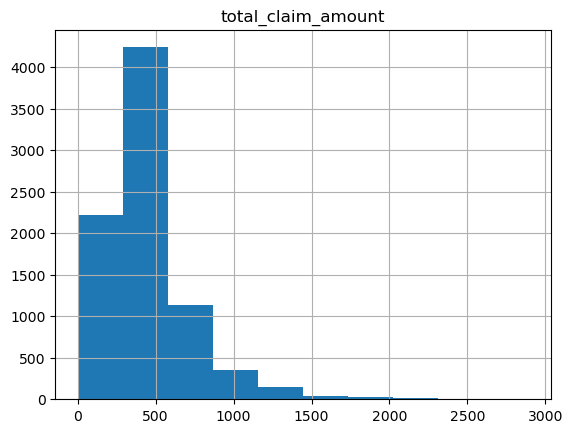

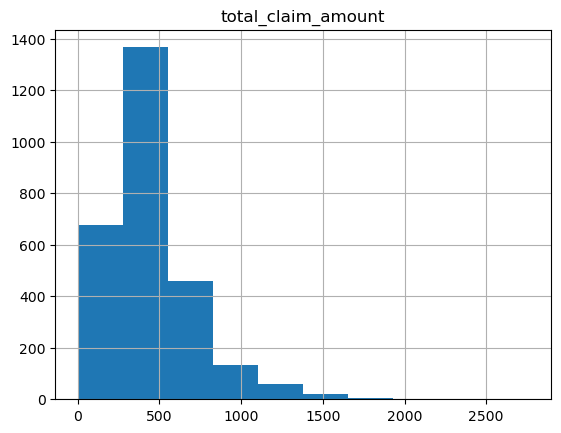

In [38]:
#checking distribution of y
y_train.hist()
y_test.hist()

#has ight scew but checking without transformation

## Model creating

In [40]:
lr=LinearRegression()

In [45]:
#training the model
model_full=lr.fit(X_train,y_train)
print("model_coefficients:", model_full.coef_)
print("model_intercept:",model_full.intercept_)

model_coefficients: [[ 6.12704415e+00 -1.88102507e+01  8.46582039e+01  4.28812789e+00
   1.34895854e-01 -1.52584574e+00 -2.42299539e+00 -4.88919173e-02
   5.12695113e+13  6.52814537e+13  3.85353801e+13  5.97033095e+13
   3.73318359e+13 -3.77444075e+11 -3.77444075e+11  5.85264666e+13
   1.34302386e+14  5.91741741e+13  4.69765497e+13  1.20626620e+14
  -1.00959425e+14 -1.00959425e+14 -1.78003376e+14 -2.17823769e+14
  -1.72328602e+14 -5.23978486e+13 -7.21546320e+13 -6.48188232e+13
   1.61321730e+13  2.01015976e+13  2.63076319e+13  2.83903054e+13
   3.48908193e+13  4.01634861e+13  7.24151625e+12  1.09674170e+13
   9.83565033e+12 -2.44619396e+14 -2.31700683e+14 -1.82372107e+14
  -1.54597509e+14  3.75687373e+13  3.46421254e+13  3.08924884e+13
   2.75072340e+13 -2.65849243e+13 -6.90850516e+12 -7.39886716e+12
  -2.06393954e+13 -1.17689556e+13 -2.11836864e+13  0.00000000e+00
   2.09580078e+01 -4.34960938e+00 -6.72363281e-01]]
model_intercept: [434.5978312]


In [46]:
#testing model
y_pred=pd.DataFrame(lr.predict(X_test))

In [53]:
#calculating mean errors
MSE_full=mse(y_pred,y_test)
MAE_full=mae(y_pred,y_test)
RMSE_full=mse(y_pred,y_test, squared=False)
print(f"mse_full:{MSE_full}\nmae_full: {MAE_full}\nRMSE:{RMSE_full}")

mse_full:21538.71679060425
mae_full: 100.96278689489496
RMSE:146.760746763582


## R2 calculating

In [56]:
#calculating R2 for predictions
r2_test=r2_score(y_test,y_pred)
r2_test

0.7408420741787296

In [60]:
#calculating R2 for train set

#creating predictions from the train set
y_train_pred=pd.DataFrame(lr.predict(X_train))

#calculating R2
r2_train=r2_score(y_train,y_train_pred)
r2_train

0.7385177338649123

In [63]:
diff_r2=round(r2_test/r2_train*100, 2)
diff_r2

100.31

# USING A MODEL WHERE Y is transformed too

In [88]:
X1=df_full.drop(["total_claim_amount"], axis=1)
y1=df_full[["total_claim_amount"]]

In [89]:
X1_train, X1_test, y1_train, y1_test=train_test_split(X1,y1,random_state=42)

In [90]:
pt.fit(X1_train)
X1_train=pd.DataFrame(pt.transform(X1_train))

In [91]:
X1_test=pd.DataFrame(pt.transform(X1_test))

In [93]:
pt.fit(y1_train)
y1_train=pd.DataFrame(pt.transform(y1_train))
y1_test=pd.DataFrame(pt.transform(y1_test))

In [95]:
model_last=lr.fit(X1_train, y1_train)

In [97]:
y1_pred=pd.DataFrame(lr.predict(X1_test))

In [98]:
r2_score(y1_test,y1_pred)

0.8214215840003907

In [99]:
y1_train_pred=pd.DataFrame(lr.predict(X1_train))
r2_score(y1_train,y1_train_pred)

0.820510951690175

In [110]:
y1_pred

,0
0,0.014388
1,0.120886
2,0.335107
3,0.666400
4,-0.186670
...,...
2723,0.371610
2724,0.016663
2725,-1.551885
2726,0.441847


In [111]:
y_pred_original_scale=pd.DataFrame(pt.inverse_transform(y1_pred))
y_pred_original_scale

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


,0
0,386.311901
1,416.046928
2,479.495887
3,587.304943
4,333.414936
...,...
2723,490.795195
2724,386.934701
2725,81.926672
2726,512.938979
